# Low-mass subhalo background

*5 Dec 2023*

This should be a quick notebook for calculations regarding the low-mass subhalo background.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import os

from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.5, Om0=0.316)

In [2]:
max_mass = 1e8
beta = -1.9 # cite "springel2008aquarius"

In [3]:
# Load image
data_dir = '/n/holyscratch01/dvorkin_lab/Users/atsang/mif'
folder = 'in_cattrain_sub_m8m11ninety_noise10_c60_hstelt3'
im = np.load(os.path.join(data_dir, folder, '0.npy'))
pixsize = .01

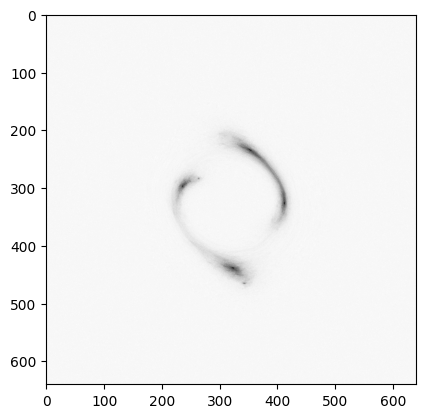

In [4]:
plt.imshow(im, 'Greys')

In [5]:
bright_pixels = im > .05 * np.max(im)

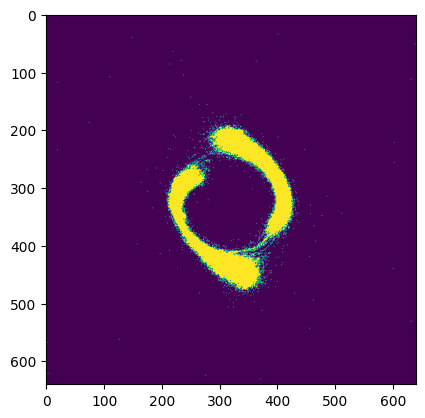

In [6]:
plt.imshow(bright_pixels)

In [7]:
bright_area = np.sum(bright_pixels) * pixsize**2 # arcsec^2

In [8]:
bright_area

1.9037000000000002

In [9]:
n_per_assq = 100 # very roughly 100-1000

In [10]:
integral_fn = lambda low, high :  - 1 / .9 * (high**(-.9) - low**(-.9))
integral = integral_fn(1e5, 1e8)
integral

3.506631207470641e-05

In [11]:
normaliz = n_per_assq / integral

In [12]:
normaliz * integral # per arcsec sq

100.0

In [13]:
normaliz * integral_fn(1e6, 1e8) # per arcsec sq

12.414498066596318

In [14]:
normaliz * integral_fn(1e6, 1e8) * bright_area # very rough estimate of how many background subhalos we can expect

23.63347996937941

In [15]:
normaliz * integral_fn(1e6, 1e8) * (6.4)**2 # very rough estimate of how many background subhalos we can expect

508.4978408077853

## Generate masses randomly

In [16]:
A = (-1/.9*(1e8**(-.9) - 1e6**(-.9)))**(-1)

In [17]:
A

229710.44402559614

In [18]:
-A*1e8**(-.9)/.9

-0.016104165751306236

In [19]:
xs = []

for i in range(10000):
    f = np.random.uniform(-1.016, -.016)
    x = (-.9 * f / A)**(-1/.9)
    xs.append(x)

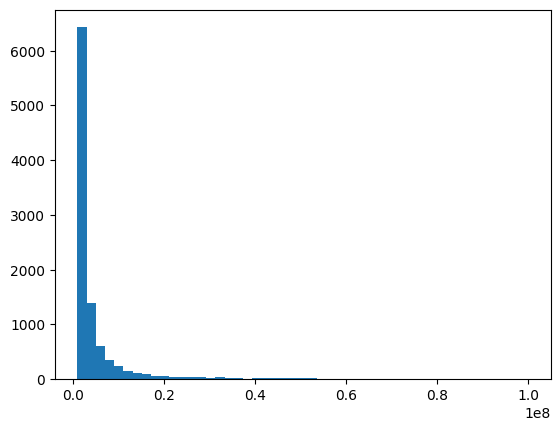

In [20]:
ys, bins, _ = plt.hist(xs, bins=np.linspace(1e6,1e8,50))

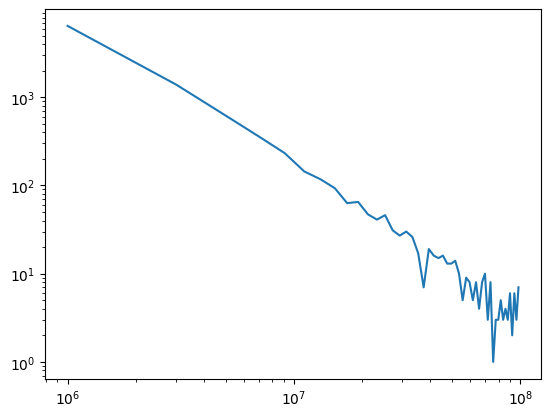

In [21]:
plt.plot(bins[:-1], ys)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

In [22]:
(np.log10(ys[-1]) - np.log10(ys[0])) / (np.log10(bins[-2]) - np.log10(bins[0]))

-1.488220067543737

In [23]:
def powlaw(x, a, pow):
    return a * x**pow

In [24]:
ys[0] / 1e6**(-1.9)

1615645352746959.8

In [25]:
np.log10(1594545506722279.5)

15.20263691808281

In [26]:
from scipy.optimize import curve_fit

In [27]:
popt, pcov = curve_fit(powlaw, bins[:-1], ys, p0=[1e15, -1.9])

In [28]:
popt

array([ 3.54390114e+12, -1.45672532e+00])

In [29]:
powlaw(1e6, 5e5, -1.9)

1.990535852767489e-06

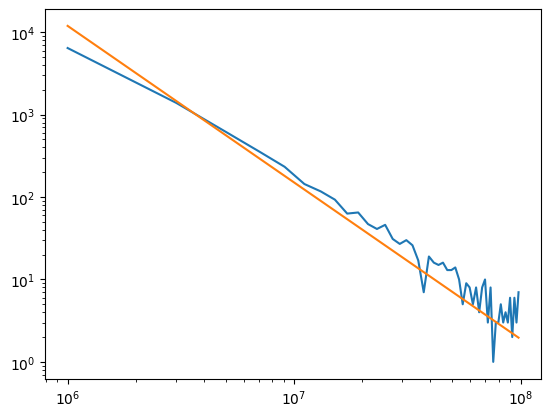

In [30]:
plt.plot(bins[:-1], ys)
#plt.plot(bins[:-1], powlaw(bins[:-1], *popt))
plt.plot(bins[:-1], powlaw(bins[:-1], 3e15, -1.9))
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

In [31]:
ys

array([6.432e+03, 1.387e+03, 6.090e+02, 3.530e+02, 2.330e+02, 1.440e+02,
       1.170e+02, 9.300e+01, 6.300e+01, 6.500e+01, 4.700e+01, 4.100e+01,
       4.600e+01, 3.100e+01, 2.700e+01, 3.000e+01, 2.600e+01, 1.700e+01,
       7.000e+00, 1.900e+01, 1.600e+01, 1.500e+01, 1.600e+01, 1.300e+01,
       1.300e+01, 1.400e+01, 1.000e+01, 5.000e+00, 9.000e+00, 8.000e+00,
       5.000e+00, 8.000e+00, 4.000e+00, 8.000e+00, 1.000e+01, 3.000e+00,
       8.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
       4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 6.000e+00, 3.000e+00,
       7.000e+00])

In [32]:
ys

array([6.432e+03, 1.387e+03, 6.090e+02, 3.530e+02, 2.330e+02, 1.440e+02,
       1.170e+02, 9.300e+01, 6.300e+01, 6.500e+01, 4.700e+01, 4.100e+01,
       4.600e+01, 3.100e+01, 2.700e+01, 3.000e+01, 2.600e+01, 1.700e+01,
       7.000e+00, 1.900e+01, 1.600e+01, 1.500e+01, 1.600e+01, 1.300e+01,
       1.300e+01, 1.400e+01, 1.000e+01, 5.000e+00, 9.000e+00, 8.000e+00,
       5.000e+00, 8.000e+00, 4.000e+00, 8.000e+00, 1.000e+01, 3.000e+00,
       8.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00,
       4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 6.000e+00, 3.000e+00,
       7.000e+00])

In [33]:
bins**(-1.9)

array([3.98107171e-12, 4.87388517e-13, 1.84182490e-13, 9.70795969e-14,
       6.01850369e-14, 4.10898582e-14, 2.99069210e-14, 2.27826969e-14,
       1.79580907e-14, 1.45354884e-14, 1.20171923e-14, 1.01088617e-14,
       8.62720510e-15, 7.45315720e-15, 6.50659747e-15, 5.73197607e-15,
       5.08977754e-15, 4.55125915e-15, 4.09510176e-15, 3.70521714e-15,
       3.36927658e-15, 3.07770129e-15, 2.82295620e-15, 2.59904682e-15,
       2.40115525e-15, 2.22537285e-15, 2.06850131e-15, 1.92790275e-15,
       1.80138561e-15, 1.68711674e-15, 1.58355312e-15, 1.48938831e-15,
       1.40351008e-15, 1.32496669e-15, 1.25293981e-15, 1.18672260e-15,
       1.12570197e-15, 1.06934394e-15, 1.01718173e-15, 9.68805762e-16,
       9.23855493e-16, 8.82012471e-16, 8.42994574e-16, 8.06551129e-16,
       7.72458787e-16, 7.40518012e-16, 7.10550092e-16, 6.82394574e-16,
       6.55907068e-16, 6.30957344e-16])

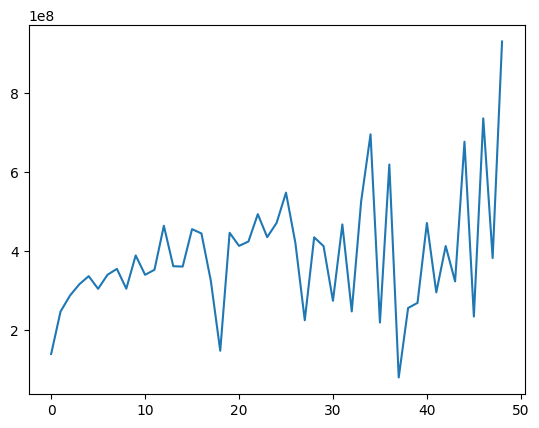

In [34]:
plt.plot(ys / bins[:-1]**(-1.9) / A / 50)

(array([815., 784., 730., 654., 578., 527., 511., 473., 399., 361., 364.,
        303., 319., 249., 267., 230., 215., 181., 198., 152., 144., 151.,
        121., 113., 115.,  94.,  88.,  78.,  67.,  72.,  55.,  62.,  42.,
         54.,  54.,  47.,  39.,  44.,  17.,  34.,  32.,  28.,  26.,  20.,
         21.,  23.,   9.,  18.,  20.]),
 array([6.        , 6.04081633, 6.08163265, 6.12244898, 6.16326531,
        6.20408163, 6.24489796, 6.28571429, 6.32653061, 6.36734694,
        6.40816327, 6.44897959, 6.48979592, 6.53061224, 6.57142857,
        6.6122449 , 6.65306122, 6.69387755, 6.73469388, 6.7755102 ,
        6.81632653, 6.85714286, 6.89795918, 6.93877551, 6.97959184,
        7.02040816, 7.06122449, 7.10204082, 7.14285714, 7.18367347,
        7.2244898 , 7.26530612, 7.30612245, 7.34693878, 7.3877551 ,
        7.42857143, 7.46938776, 7.51020408, 7.55102041, 7.59183673,
        7.63265306, 7.67346939, 7.71428571, 7.75510204, 7.79591837,
        7.83673469, 7.87755102, 7.91836735, 7.959183

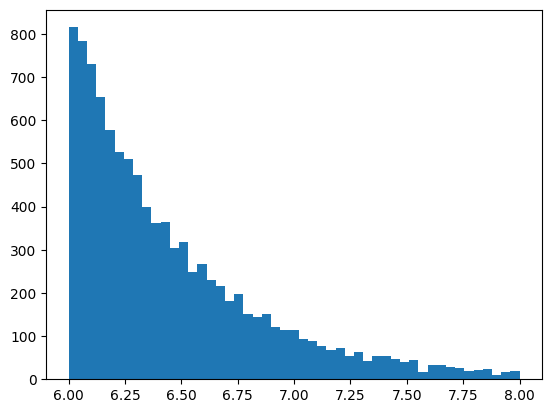

In [35]:
plt.hist(np.log10(xs), bins=np.linspace(6,8,50))

In [47]:
np.max(xs)

100229741.55970035

In [48]:
np.min(xs)

1000234.1956934828

## Now we want to generate an image with these subhalos

In [2]:
from gen_lowmass import gen_lowmass

/n/home13/atsang/.local/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
noisy, blank_noisy, coord, macro_params = gen_lowmass(0, True, 1e10, 'cattrain')

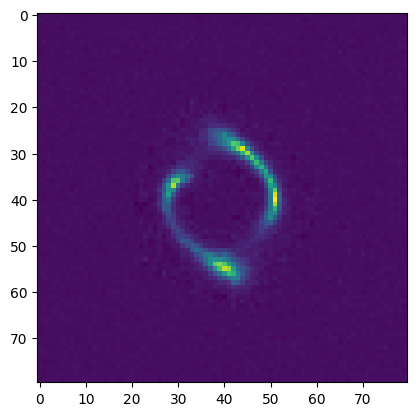

In [4]:
plt.imshow(noisy)

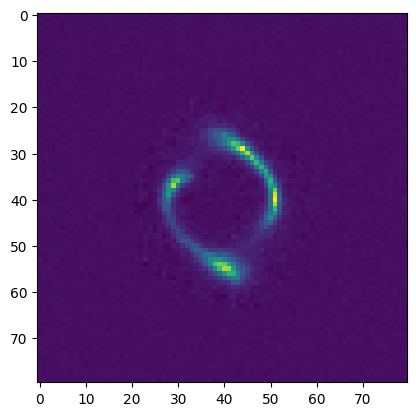

In [5]:
plt.imshow(blank_noisy)

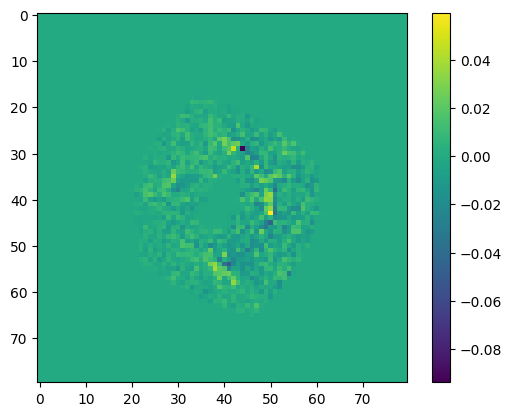

In [11]:
plt.imshow(noisy - blank_noisy)
plt.colorbar()

In [16]:
noisy2, blank_noisy2, coord2, macro_params2 = gen_lowmass(0, True, 1e10, 'cattrain', constraints={'n_lowmass':101})

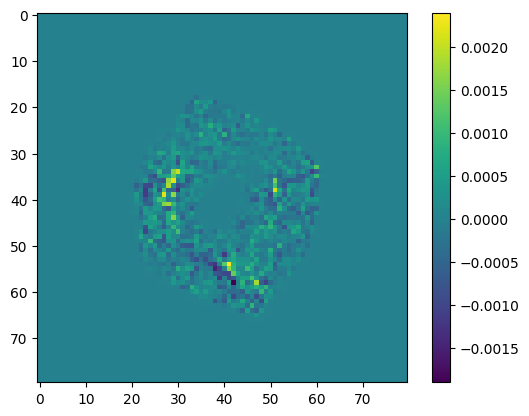

In [17]:
plt.imshow(noisy2 - noisy)
plt.colorbar()

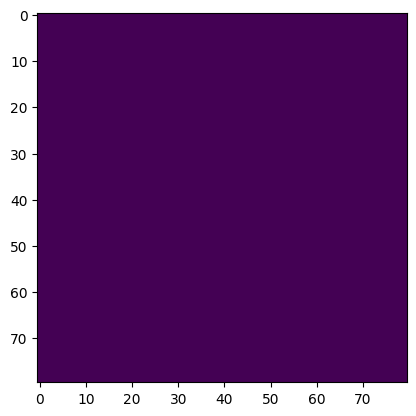

In [9]:
plt.imshow(blank_noisy2 - blank_noisy)